In [2]:
pip install flickrapi

     |████████████████████████████████| 61kB 7.6MB/s 


In [3]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
%matplotlib inline

api_key = u'45907175c467a1e968e47ab65ac17f7d'
api_secret = u'xxxxxxxxxxxxxxxx'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

In [4]:
# Creating Test directories to store images
import os
dir_test = 'test'
dir_test_color = 'test/color'
dir_test_gray = 'test/gray'

dir_exists = os.path.isdir(dir_test)
if not dir_exists:
    os.mkdir(dir_test)
    os.mkdir(dir_test_color)
    os.mkdir(dir_test_gray)
    print("Making test directory %s" % dir_test)
else:
    print("Will store images in directory %s" % dir_test)

Making test directory test


In [5]:
# Creating Train directories to store images
dir_train = 'train'
dir_train_color = 'train/color'
dir_train_gray = 'train/gray'

dir_exists = os.path.isdir(dir_train)
if not dir_exists:
    os.mkdir(dir_train)
    os.mkdir(dir_train_color)
    os.mkdir(dir_train_gray)
    print("Making train directory %s" % dir_train)
else:
    print("Will store images in directory %s" % dir_train)

Making train directory train


In [6]:
# Display the image
def disp_image(im):
    if (len(im.shape) == 2):
        # Gray scale image
        plt.imshow(im, cmap='gray')    
    else:
        # Color image.  
        im1 = (im-np.min(im))/(np.max(im)-np.min(im))*255
        im1 = im1.astype(np.uint8)
        plt.imshow(im1)    
        
    # Remove axis ticks
    plt.xticks([])
    plt.yticks([])

In [8]:
import warnings
from skimage.color import rgb2gray
    
nimage = 10 # total number of images
i = 0
nrow = 224
ncol = 224

keyword = 'photos'
photos = flickr.walk(text=keyword, tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=100) 

for photo in photos:
    url=photo.get('url_c')
    if not (url is None):
        
        # Create a file from the URL
        # This may only work in Python3
        response = requests.get(url)
        file = BytesIO(response.content)
        
        # Read image from file
        im_color = skimage.io.imread(file)
        im_gray = rgb2gray(im_color) # convert color images to gray scale
        
        # Resize images
        im_color1 = skimage.transform.resize(im_color,(nrow,ncol),mode='constant')
        im_gray1 = skimage.transform.resize(im_gray,(nrow,ncol),mode='constant')
                
        # Convert to uint8, suppress the warning about the precision loss
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            im_color2 = skimage.img_as_ubyte(im_color1)
            im_gray2 = skimage.img_as_ubyte(im_gray1)
    
        # Storing 70% images in Training set and 30% images in Test set

        if i < int(nimage*.7):
          # Save color image
          local_name1 = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_train_color, keyword, i) 
          skimage.io.imsave(local_name1, im_color2) 
          print(local_name1)

          # Save gray scale image
          local_name2 = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_train_gray, keyword, i) 
          skimage.io.imsave(local_name2, im_gray2) 
          print(local_name2)

        else:
          # Save color image
          local_name1 = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_test_color, keyword, i) 
          skimage.io.imsave(local_name1, im_color2) 
          print(local_name1)

          # Save gray scale image
          local_name2 = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_test_gray, keyword, i) 
          skimage.io.imsave(local_name2, im_gray2) 
          print(local_name2)


        i = i + 1        
    if (i >= nimage):        
        break        

train/color/photos_0000.jpg
train/gray/photos_0000.jpg
train/color/photos_0001.jpg
train/gray/photos_0001.jpg
train/color/photos_0002.jpg
train/gray/photos_0002.jpg
train/color/photos_0003.jpg
train/gray/photos_0003.jpg
train/color/photos_0004.jpg
train/gray/photos_0004.jpg
train/color/photos_0005.jpg
train/gray/photos_0005.jpg
train/color/photos_0006.jpg
train/gray/photos_0006.jpg
test/color/photos_0007.jpg
test/gray/photos_0007.jpg
test/color/photos_0008.jpg
test/gray/photos_0008.jpg
test/color/photos_0009.jpg
test/gray/photos_0009.jpg


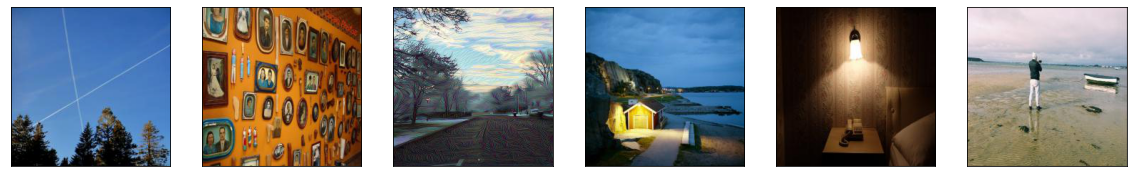

In [10]:
plt.figure(figsize=(20,20))
nplot = 6
for i in range(nplot):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_train_color,keyword, i)  
    im = skimage.io.imread(fn)
    plt.subplot(1,nplot,i+1)
    disp_image(im)

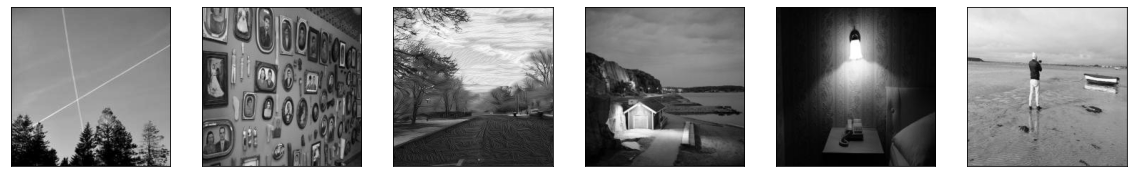

In [12]:
plt.figure(figsize=(20,20))
nplot = 6
for i in range(nplot):
    fn = '{0:s}/{1:s}_{2:04d}.jpg'.format(dir_train_gray,keyword, i)  
    im = skimage.io.imread(fn)
    plt.subplot(1,nplot,i+1)
    disp_image(im)